# XIV. HASHING: THE BASICS 
You can think about the purpose of the hash table is to maintain a possibly evolving set of things. Where of course the set of things that you're maintaining, you know, will vary with the application. It can be any number of things. So if you're running an e-commerce website, maybe you're keeping track of transactions. You know, again, maybe you're keeping track of people, like for example, your friends and various data about them. So maybe you're keeping track of I-P addresses, for example if you wanna know, who was, were there unique visitors to your websites. And so on. So a little bit more formally, you know, the basic operations, you need to be able to insert stuff into a hash table. In many, but not all applications, you need to be able to delete stuff as well. And typically the most important operation is look-up. And for all these three operation you do it in a key based way. Where as usual a key should just be a unique identifier for the record that you're concerned with.

The caveat is that, unlike most of the problems that we've solved in this course, hash tables don't enjoy worst case guarantees. You cannot say for a given hash table that for every possible data set you're gonna get cost and time. What's true is that for non-pathological data, you will get cost and time operations in a properly implemented hash table.

***
##### Properties of Hash function:
1. Should lead to good performance (i.e. should spread data out)
2. Should be easy to evaluate / fast to calculate
<br>
 And in particular good hash functions that have the two properties we identified above. But I have to warn you, if you ask ten different, you know, serious hardcore programmers, you know, about their approach to designing hash functions, you're likely to get ten somewhat different answers. So the design of hash functions is a tricky topic, and, it's as much art as science at this point.
*** 

##### Resolving Collisions: 
    1. Chaining  
    2. Open addressing(linear probing and double hashing)
    
***
##### linear probing
In linear probing, even in a best case scenario, it's going to be subject to clumping. You're going to have contiguous Groups of slots which are all full, and that's because of the linear probing strategy. 

***

## Quick and Dirty Hash Function
In particular if you just need a hash function, and you need a quick and dirty one, you don't want to spend too much time on it. The method that I'm going to talk about below is a common way of doing it. On the other hand, if you're designing a hash function for some really mission-critical code, you should learn more than what I'm gonna tell you about below. So you, you should do more research about what are the best hash functions, what's the state of the art, if you have a super important hash function.

There are standard methods for doing that, it's easy to find resources to, to give you example code for converting strings to integers you know, I'll just say one or two sentences about it. So you know each character in a string it is easy to regard as a number in various ways. Either you know just say it is ASCII, well ASCII code then you just have to aggregate all of the different numbers, one number per character into some overall number and so one thing you can do is you can iterate over the characters one at a time. You can keep a running sum. And with each character, you can multiply the running sum by some constant, and then add the new letter to it, and then, if you need to, take a module list to prevent overflow.

![Quick and Dirty Hash Function](images/4_quick_and_dirty_hash_function.png)


# XV. UNIVERSAL HASHING 
If we have our set h that we know exactly what it is. What does it mean that it's universal? It means for each pair of distinct keys, for example for each pair of IP addresses, the probability that a random hash function from our family script h causes a collision, maps these two IP addresses to the same bucket should be no worse than with perfectly random hashing. So no worse than 1/n where n is the number of buckets, say like 997.
So  if you draw a hash function uniformly at random from a universal family of hash functions, then you're guaranteed expected constant time for all of the supported operations. 

![UNIVERSAL HASHING](images/5_universal_hashing.png)


So hash tables support various operations, Insert, Delete and Lookup. But really if we can just bound a running time of an unsuccessful lookup, that's going to be enough to bound the running time of all of these operations. 

So, as long as you have a hash function which you can compute quickly in constant time. And as long as you keep the load under control so the number of buckets is commensurate with the size of the data set that you're storing. That's why, universal hash functions in a hash table with chaining guarantee expected constant time performance.


In [62]:
import urllib3


class Hash_Table_chaining:
    from random import randint
    import matplotlib.pyplot as plt
    
    #import numpy as np
    
    def __init__(self, size = 10):
        self.hash_table = [None] * size
        self.random_nos = [self.randint(1, 1000) for _ in range(0, 4)]
        
    def __repr__(self):
        return str(self.hash_table)
            
    def __getitem__(self, index):
        n = len(self.hash_table)
        if n <= index:
            return None
        else:
            return self.hash_table[index]
    
    def __setitem__(self, index, value):
        self.hash_table[index] = value

    def universal_hashing(self, element):
        character_arr = list(element) 
        ord_arr = [ord(i) for i in character_arr]
        # universal hashing using random choice from a family of hash functions
        # our family of hash functions has to choose 4 random number from 1 to 1000 as we have n = 1000 = number of buckets
        # thus our random hash function is equivalent to the gold standard of uniform random variable that
        # would've chosen an index in the array of size 1000 
        len25 = len(ord_arr) // 4
        dot_sum_ord = 0
        index = None
        for piece in range(len(self.random_nos)):
            dot_sum_ord += self.random_nos[piece] * sum(ord_arr[piece*len25:(piece+1)*len25]) 
            index = dot_sum_ord % 997  # avoiding 2 or 10 and using prime close to n = 1000 = number of buckets
        return index
            
            
    def insert(self, element):
        index = self.universal_hashing(element)
        if self.hash_table[index] == None:
            self.hash_table[index] = [element]
        else:
            self.hash_table[index].append(element)
            
            
    def lookup(self, element):
        index = self.universal_hashing(element)
        if self.hash_table[index] == None:
            return None
        elif element not in self.hash_table[index]:
            return None
        else:
            return index
        
    def delete(self, element):
        index = self.universal_hashing(element)
        if self.hash_table[index] == None:
            return None
        elif element not in self.hash_table[index]:
            return None
        else:
            self.hash_table[index].remove(element)
            return index
        
        
    def _load_index(self, index):
        if self.hash_table[index] == None:
            return 0
        else:
            return len(self.hash_table[index])
        
    
    def load_visualize(self):
        index = range(len(self.hash_table))
        load = [self._load_index(i) for i in index]
        self.plt.bar(index, load)
        self.plt.xlabel('Hash table Indices', fontsize=5)
        self.plt.ylabel('Load', fontsize=5)
        #self.plt.xticks(index, label, fontsize=5, rotation=30)
        self.plt.title('Hash table Load Visualization')
        self.plt.show()
    


In [66]:
hash_table_obj = Hash_Table_chaining(1000)

# insert api
http = urllib3.PoolManager()
r1 = http.request('GET', "https://raw.githubusercontent.com/aishwarya34/AlgorithmsIlluminated/master/500_twitch_usernames.txt")
IntegerMatrixStringJoin = r1.data.split('\n')
IntegerMatrixStringJoin = IntegerMatrixStringJoin[:-1]
for username in IntegerMatrixStringJoin:
    hash_table_obj.insert(username)
        
# lookup api        
#print(hash_table_obj)
print("Element \'watermelonfarmers\' found at index : {}".format(hash_table_obj.lookup('watermelonfarmers')))

Element 'watermelonfarmers' found at index : 352


/Users/aishwaya/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [67]:
# __getitem__ and __setitem__
print(hash_table_obj[0])
hash_table_obj[0] = None
print(hash_table_obj[0])
print(hash_table_obj[352])

None
None
['watermelonfarmers']


In [68]:
# delete api
print("Element \'watermelonfarmers\' found at index : {}".format(hash_table_obj.lookup('watermelonfarmers')))
print(" \'watermelonfarmers\' deleted at index : {}".format(hash_table_obj.delete('watermelonfarmers')))
print("Element \'watermelonfarmers\' found at index : {}".format(hash_table_obj.lookup('watermelonfarmers')))

Element 'watermelonfarmers' found at index : 352
 'watermelonfarmers' deleted at index : 352
Element 'watermelonfarmers' found at index : None


### You can see below the minimum load is 0 and maximum load is 3

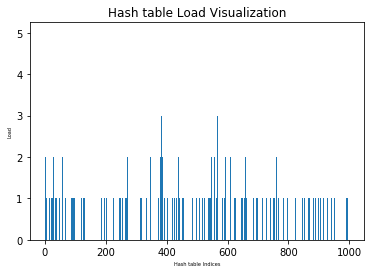

In [53]:
hash_table_obj.load_visualize()